In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

football_data = pd.read_excel("Final.xlsx")
football_data.head()

,Unnamed: 0,Unnamed: 0.1,Player,Market value,Nation,Pos,Club_x,Leauge,Age,MP,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
0,0,0,Kylian Mbappé,€180.00m,FRA,FW,Paris S-G,Ligue1,20.0,49.0,...,7.0,3.0,1152.0,1494.0,77.11,2120.0,132.0,247.0,53.44,152.0
1,1,1,Raheem Sterling,€128.00m,ENG,FW,Manchester City,Premier Leauge,24.0,60.0,...,27.0,13.0,1963.0,2414.0,81.32,3209.0,139.0,258.0,53.88,151.0
2,2,2,Neymar,€128.00m,BRA,"MF,FW",Paris S-G,Ligue1,27.0,32.0,...,10.0,2.0,1588.0,2016.0,78.77,2696.0,164.0,292.0,56.16,184.0
3,3,3,Sadio Mané,€120.00m,SEN,FW,Liverpool,Premier Leauge,27.0,64.0,...,28.0,11.0,1728.0,2214.0,78.05,3050.0,128.0,212.0,60.38,142.0
4,4,4,Mohamed Salah,€120.00m,EGY,FW,Liverpool,Premier Leauge,27.0,65.0,...,12.0,5.0,1516.0,2029.0,74.72,2893.0,137.0,229.0,59.83,148.0


In [2]:
football_data = football_data.drop(["Unnamed: 0", "Unnamed: 0.1"],axis='columns')
football_data.head()

,Player,Market value,Nation,Pos,Club_x,Leauge,Age,MP,Starts,Min,...,Int,Clr,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl
0,Kylian Mbappé,€180.00m,FRA,FW,Paris S-G,Ligue1,20.0,49.0,41.0,3856.0,...,7.0,3.0,1152.0,1494.0,77.11,2120.0,132.0,247.0,53.44,152.0
1,Raheem Sterling,€128.00m,ENG,FW,Manchester City,Premier Leauge,24.0,60.0,56.0,4968.0,...,27.0,13.0,1963.0,2414.0,81.32,3209.0,139.0,258.0,53.88,151.0
2,Neymar,€128.00m,BRA,"MF,FW",Paris S-G,Ligue1,27.0,32.0,31.0,2757.0,...,10.0,2.0,1588.0,2016.0,78.77,2696.0,164.0,292.0,56.16,184.0
3,Sadio Mané,€120.00m,SEN,FW,Liverpool,Premier Leauge,27.0,64.0,61.0,5327.0,...,28.0,11.0,1728.0,2214.0,78.05,3050.0,128.0,212.0,60.38,142.0
4,Mohamed Salah,€120.00m,EGY,FW,Liverpool,Premier Leauge,27.0,65.0,64.0,5579.0,...,12.0,5.0,1516.0,2029.0,74.72,2893.0,137.0,229.0,59.83,148.0


In [3]:
football_data = football_data.rename({"Leauge": "League"}, axis='columns')

In [4]:
football_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            517 non-null    object 
 1   Market value      517 non-null    object 
 2   Nation            370 non-null    object 
 3   Pos               370 non-null    object 
 4   Club_x            370 non-null    object 
 5   League            370 non-null    object 
 6   Age               363 non-null    float64
 7   MP                356 non-null    float64
 8   Starts            356 non-null    float64
 9   Min               356 non-null    float64
 10  Gls               356 non-null    float64
 11  Ast               356 non-null    float64
 12  PK_x              356 non-null    float64
 13  PKatt_x           356 non-null    float64
 14  CrdY              356 non-null    float64
 15  CrdR              356 non-null    float64
 16  Gls90             356 non-null    float64
 1

In [5]:
## Get a sense of how market value is represented in the data

football_data["Market value"].value_counts()

€20.00m     60
€32.00m     39
€16.00m     38
€24.00m     37
€28.00m     34
€17.50m     32
€40.00m     30
€22.50m     29
€48.00m     19
€18.00m     17
€36.00m     16
€56.00m     12
€25.50m     11
€64.00m     10
€19.00m      9
€72.00m      8
€31.50m      8
€52.00m      7
€80.00m      7
€45.00m      6
€44.00m      6
€18.50m      5
€60.00m      5
€25.00m      5
€27.00m      5
€30.50m      5
€120.00m     4
€21.50m      4
€22.00m      4
€17.00m      3
€30.00m      3
€68.00m      3
€35.00m      3
€54.00m      3
€49.50m      3
€40.50m      3
€33.50m      2
€29.00m      2
€81.00m      2
€128.00m     2
€24.50m      2
€33.00m      1
€21.00m      1
€65.00m      1
€117.00m     1
€50.00m      1
€112.00m     1
€23.00m      1
€75.00m      1
€99.00m      1
€67.50m      1
€96.00m      1
€37.50m      1
€29.50m      1
€180.00m     1
Name: Market value, dtype: int64

In [6]:
## Convert the Market Value column into int with vectorized string cleaning and type conversion

def euros_to_num(euro_string):
    euro_string = euro_string.replace("€", "")
    num_string = euro_string.split(".")[0] + euro_string.split(".")[1][:2]
    num_string += 4*"0"
    return num_string

football_data["Market value"] = football_data["Market value"].map(euros_to_num).astype(int)

In [7]:
football_data["Market value"].describe()

count    5.170000e+02
mean     3.305706e+07
std      2.015584e+07
min      1.600000e+07
25%      2.000000e+07
50%      2.700000e+07
75%      4.000000e+07
max      1.800000e+08
Name: Market value, dtype: float64

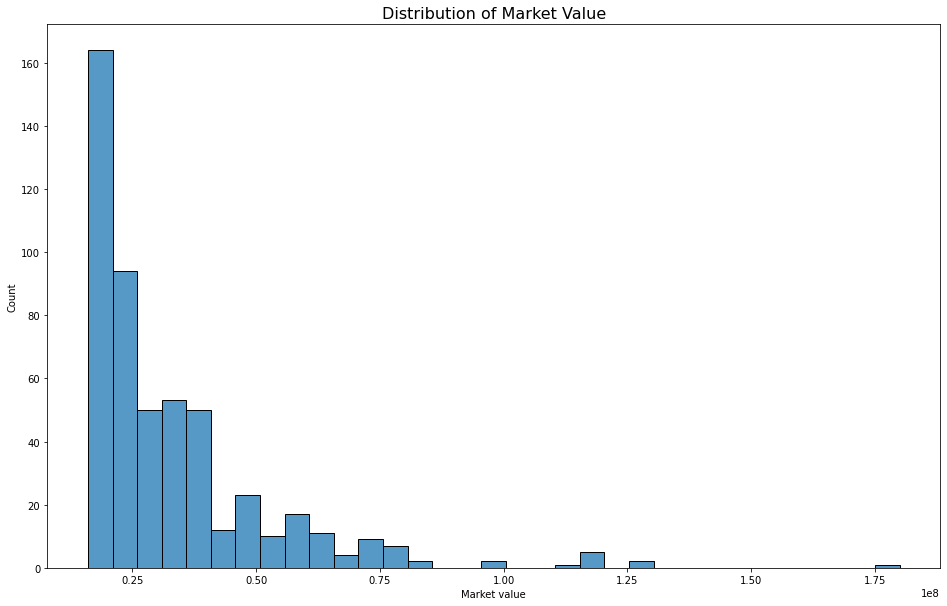

In [8]:
plt.figure(figsize=(16,10))

plt.title("Distribution of Market Value", fontdict={'fontsize': 16})

sns.histplot(football_data["Market value"])

plt.show()

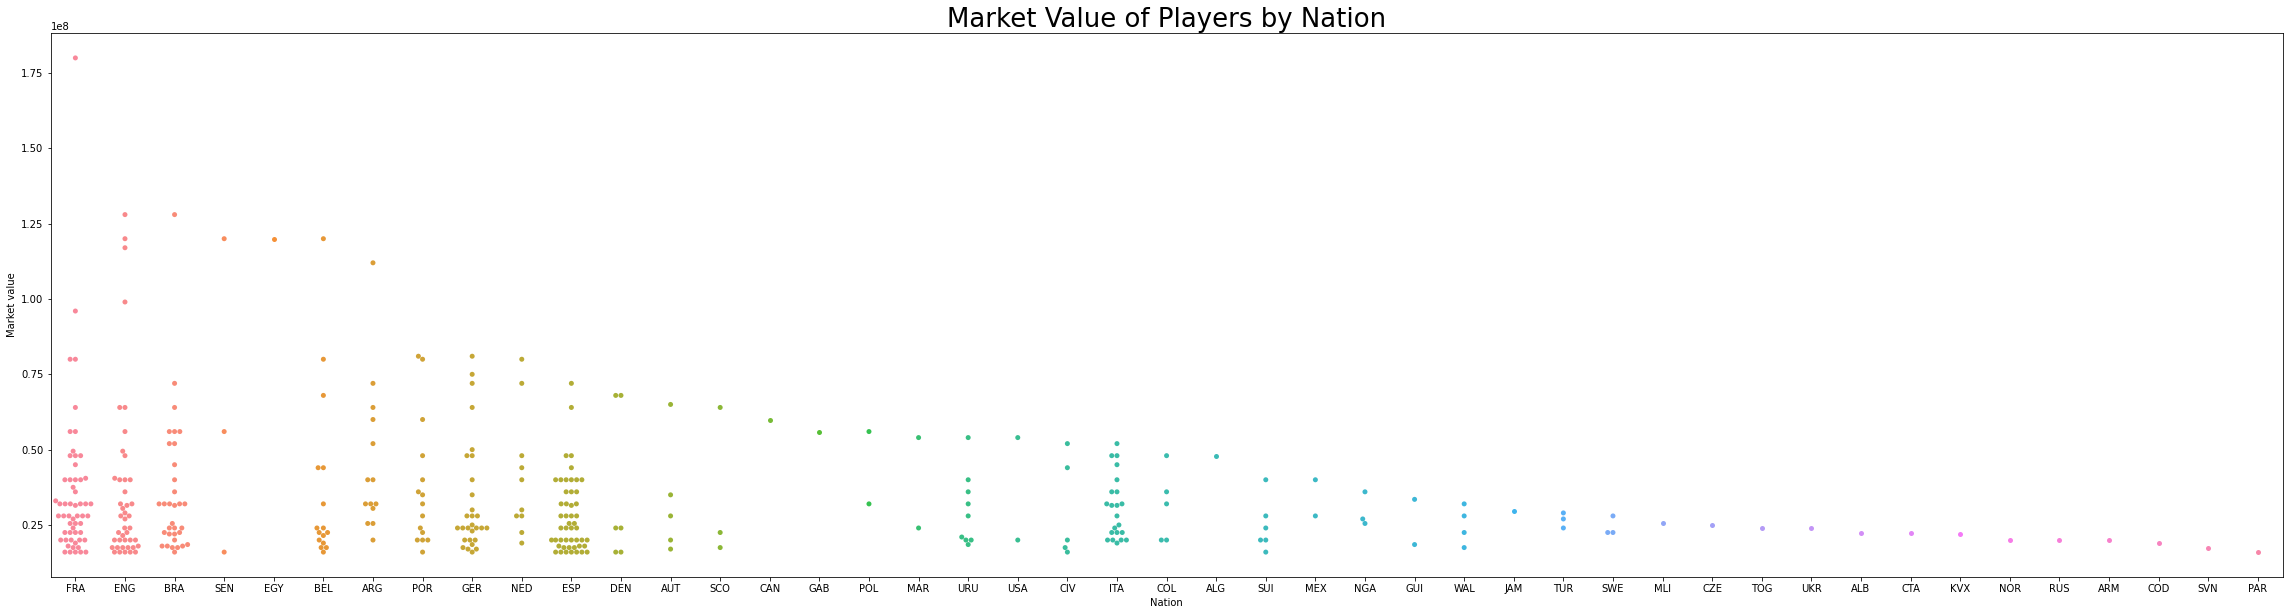

In [9]:
%matplotlib inline

plt.figure(figsize=(40,10))

sns.swarmplot(x=football_data["Nation"],y=football_data["Market value"])
plt.title("Market Value of Players by Nation", fontdict={'fontsize': 26})

plt.show()

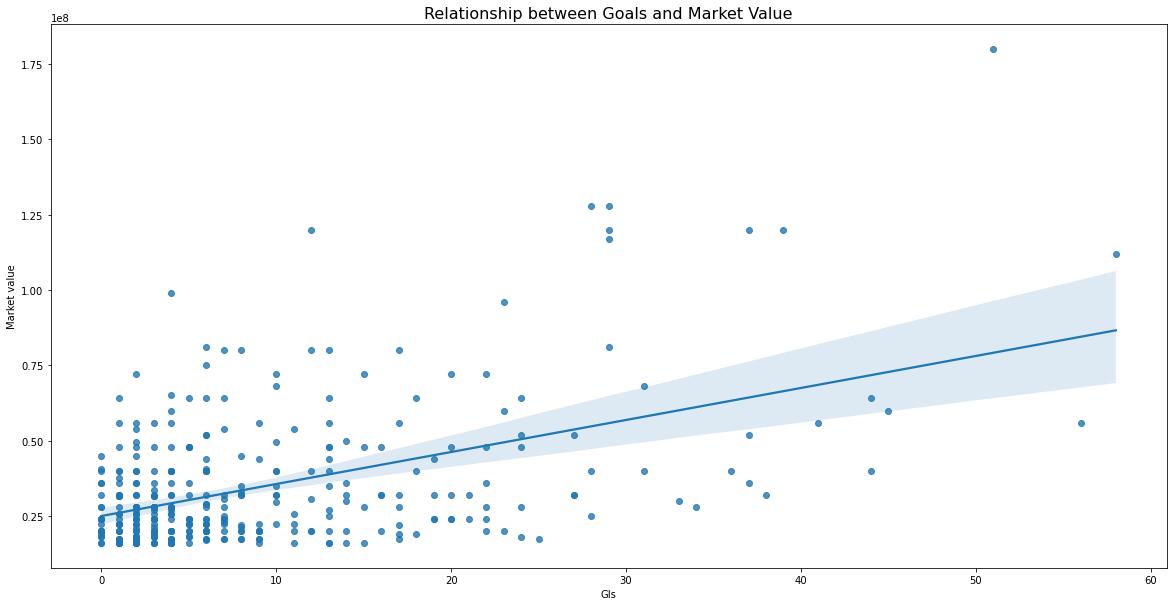

In [10]:
plt.figure(figsize=(20,10))

sns.regplot(x=football_data["Gls"], y=football_data["Market value"])

plt.title("Relationship between Goals and Market Value", fontdict={'fontsize': 16})

plt.show()

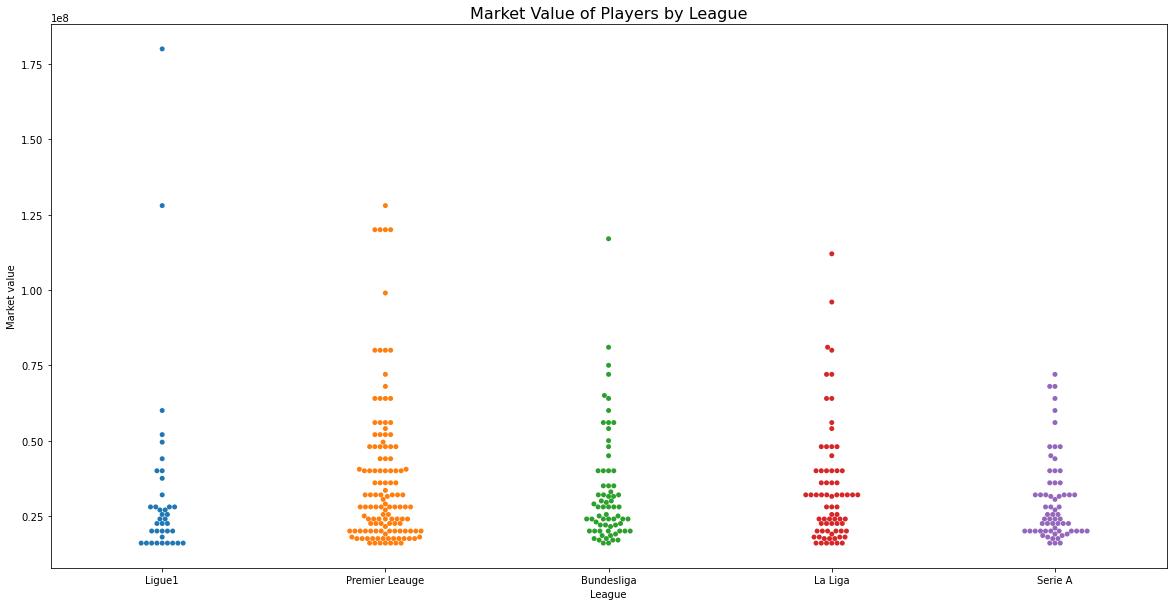

In [11]:
plt.figure(figsize=(20,10))

sns.swarmplot(x=football_data["League"],y=football_data["Market value"])
plt.title("Market Value of Players by League", fontdict={'fontsize': 16})

plt.show()

In [12]:
football_data[["Pos_1", "Pos_2"]] = football_data["Pos"].str.split(",", expand=True)
football_data[["Pos_1", "Pos_2"]]

,Pos_1,Pos_2
0,FW,None
1,FW,None
2,MF,FW
3,FW,None
4,FW,None
...,...,...
512,MF,FW
513,MF,FW
514,MF,FW
515,MF,FW


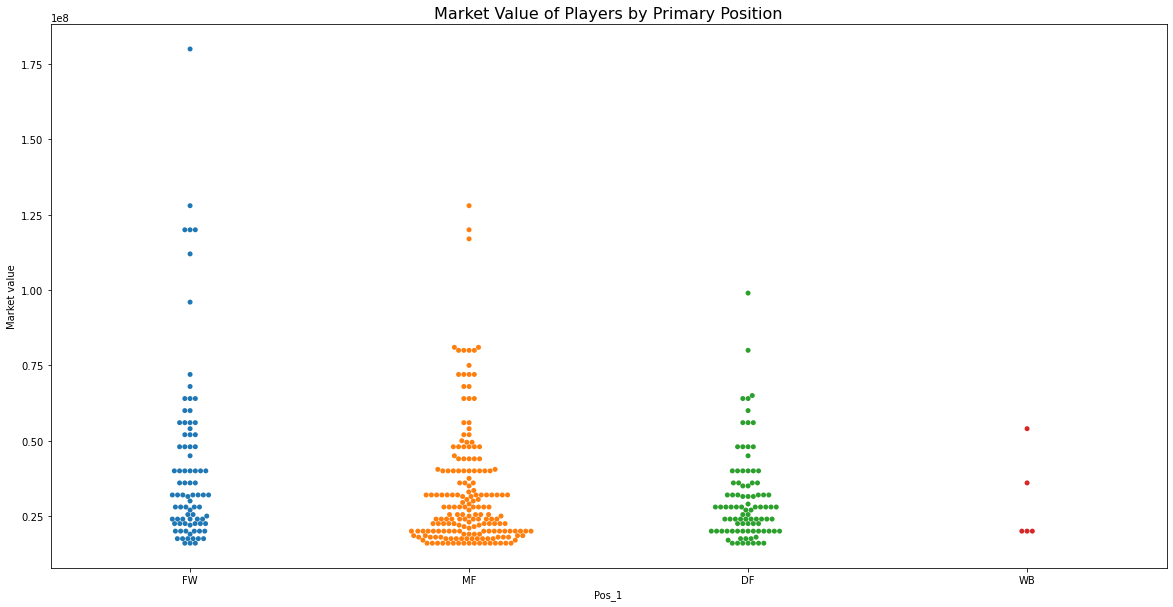

In [13]:
plt.figure(figsize=(20,10))

sns.swarmplot(x=football_data["Pos_1"],y=football_data["Market value"])
plt.title("Market Value of Players by Primary Position", fontdict={'fontsize': 16})

plt.show()

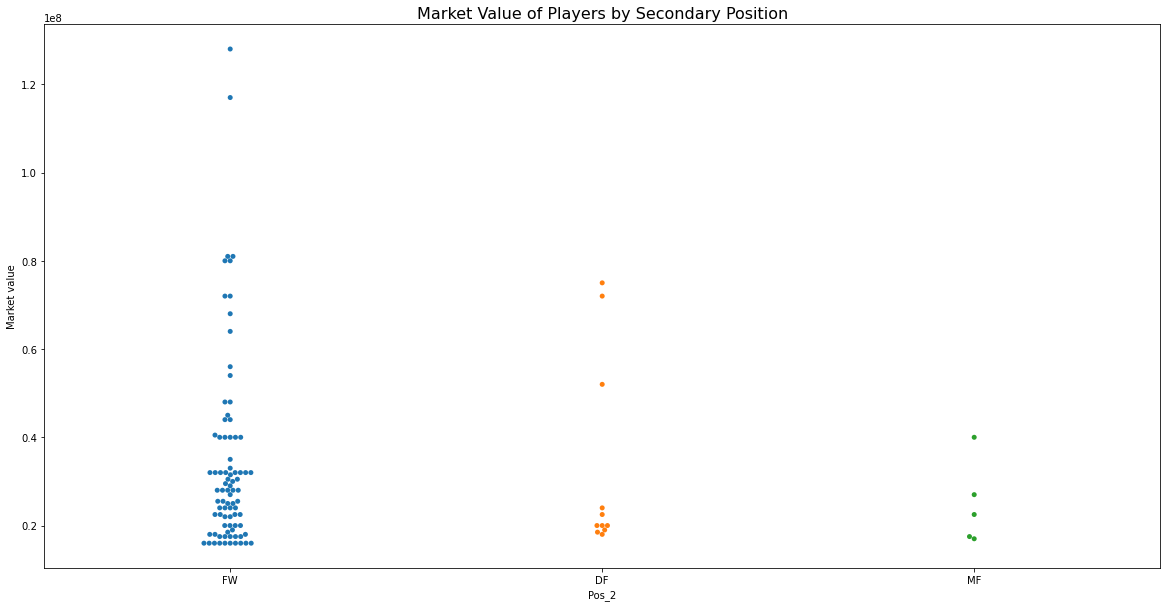

In [14]:
plt.figure(figsize=(20,10))

sns.swarmplot(x=football_data["Pos_2"],y=football_data["Market value"])
plt.title("Market Value of Players by Secondary Position", fontdict={'fontsize': 16})

plt.show()

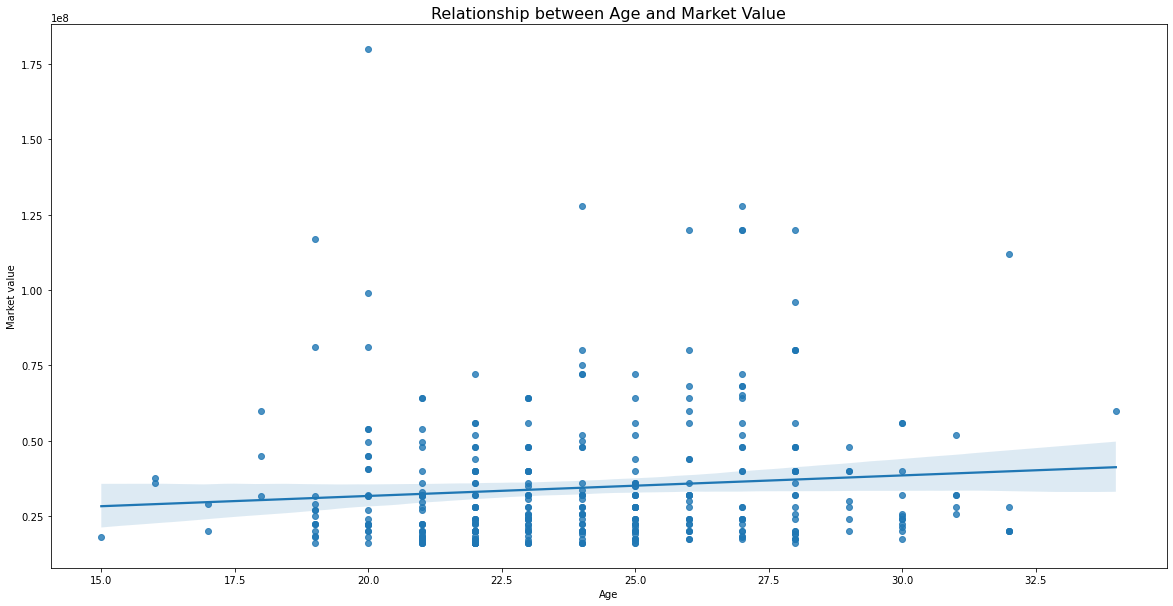

In [15]:
plt.figure(figsize=(20,10))

plt.title("Relationship between Age and Market Value", fontdict={'fontsize': 16})

sns.regplot(x=football_data["Age"], y=football_data["Market value"])

plt.show()

<Figure size 1440x720 with 0 Axes>

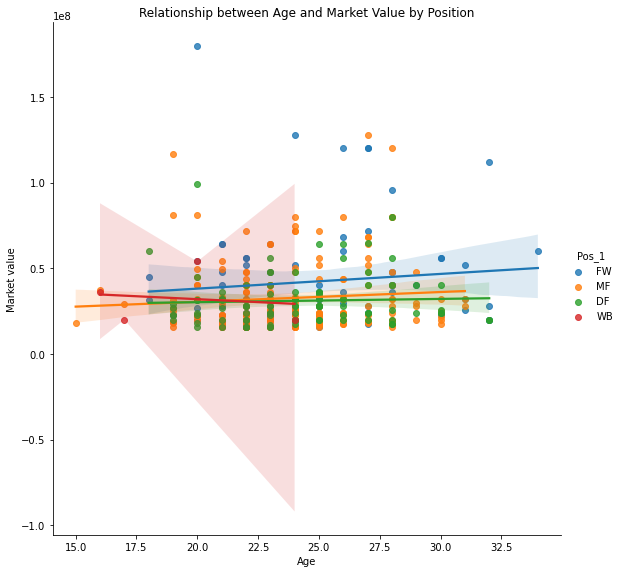

In [16]:
plt.figure(figsize=(20, 10))

sns.lmplot(data=football_data, x="Age", y="Market value", hue="Pos_1", height=8)

plt.title("Relationship between Age and Market Value by Position", fontdict={'fontsize': 12})

plt.show()

In [24]:
## Exploring entries that have a missing data, not including the secondary position column we created

football_data.loc[football_data.drop("Pos_2", axis='columns').isna().any(axis=1)]

,Player,Market value,Nation,Pos,Club_x,League,Age,MP,Starts,Min,...,Passes Completed,Passes Attempted,Cmp%,Touches,Succ_y,Att,Succ%,#Pl,Pos_1,Pos_2
15,Leroy Sané,80000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Jan Oblak,80000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Erling Haaland,72000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Alisson,72000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Marc-André ter Stegen,72000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Viktor Tsygankov,16000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,Unai Simón,16000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,Talisca,16000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,Wilmar Barrios,16000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
## Figuring out the significance of Gls + Ast vs. G+A

football_data[["Gls", "Ast", "Gls90", "Ast90", "G+A", "Gls+Ast"]]

,Gls,Ast,Gls90,Ast90,G+A,Gls+Ast
0,51.0,12.0,1.19,0.28,1.47,63.0
1,29.0,10.0,0.53,0.18,0.71,39.0
2,28.0,13.0,0.91,0.42,1.33,41.0
3,37.0,8.0,0.63,0.14,0.77,45.0
4,39.0,15.0,0.63,0.24,0.87,54.0
...,...,...,...,...,...,...
512,9.0,3.0,0.46,0.15,0.61,12.0
513,13.0,6.0,0.40,0.19,0.59,19.0
514,4.0,3.0,0.14,0.10,0.24,7.0
515,3.0,4.0,0.13,0.17,0.30,7.0


Gls+Ast appears to be the sum of the Gls and Ast columns, and G+A appears to be the sum of the Gls90 and Ast90 columns. It would be better then to drop them before doing correlations/ML techniques.

Another group of variables we can explore relationships with is the columns for yellow and red penalty cards (e.g. are they distributed differently by league?)

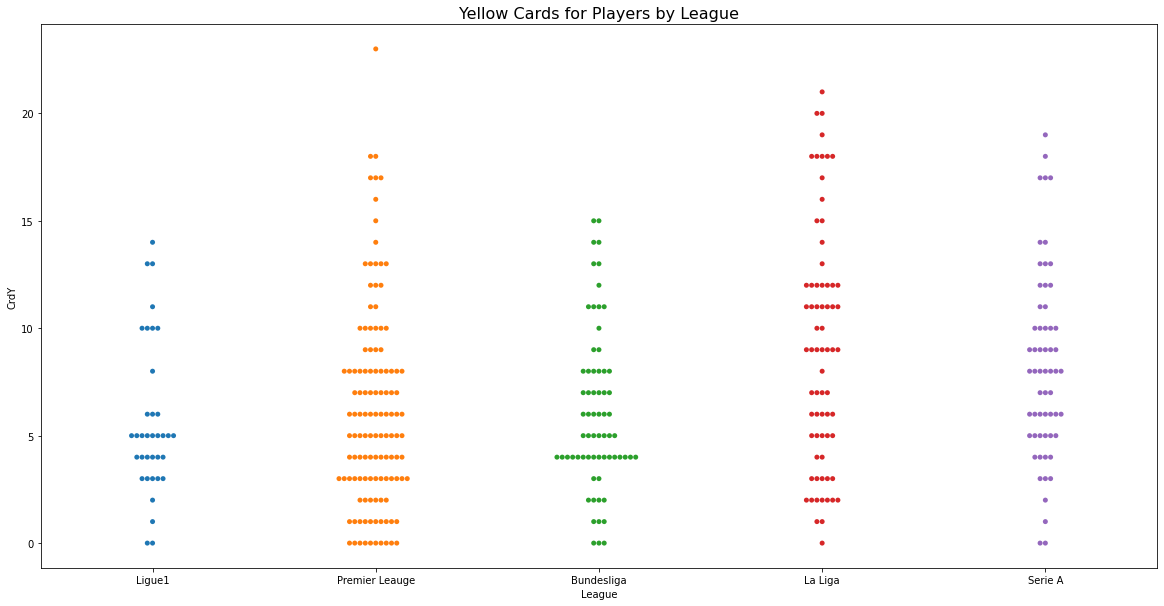

In [35]:
plt.figure(figsize=(20,10))

sns.swarmplot(x=football_data["League"],y=football_data["CrdY"])
plt.title("Yellow Cards for Players by League", fontdict={'fontsize': 16})

plt.show()

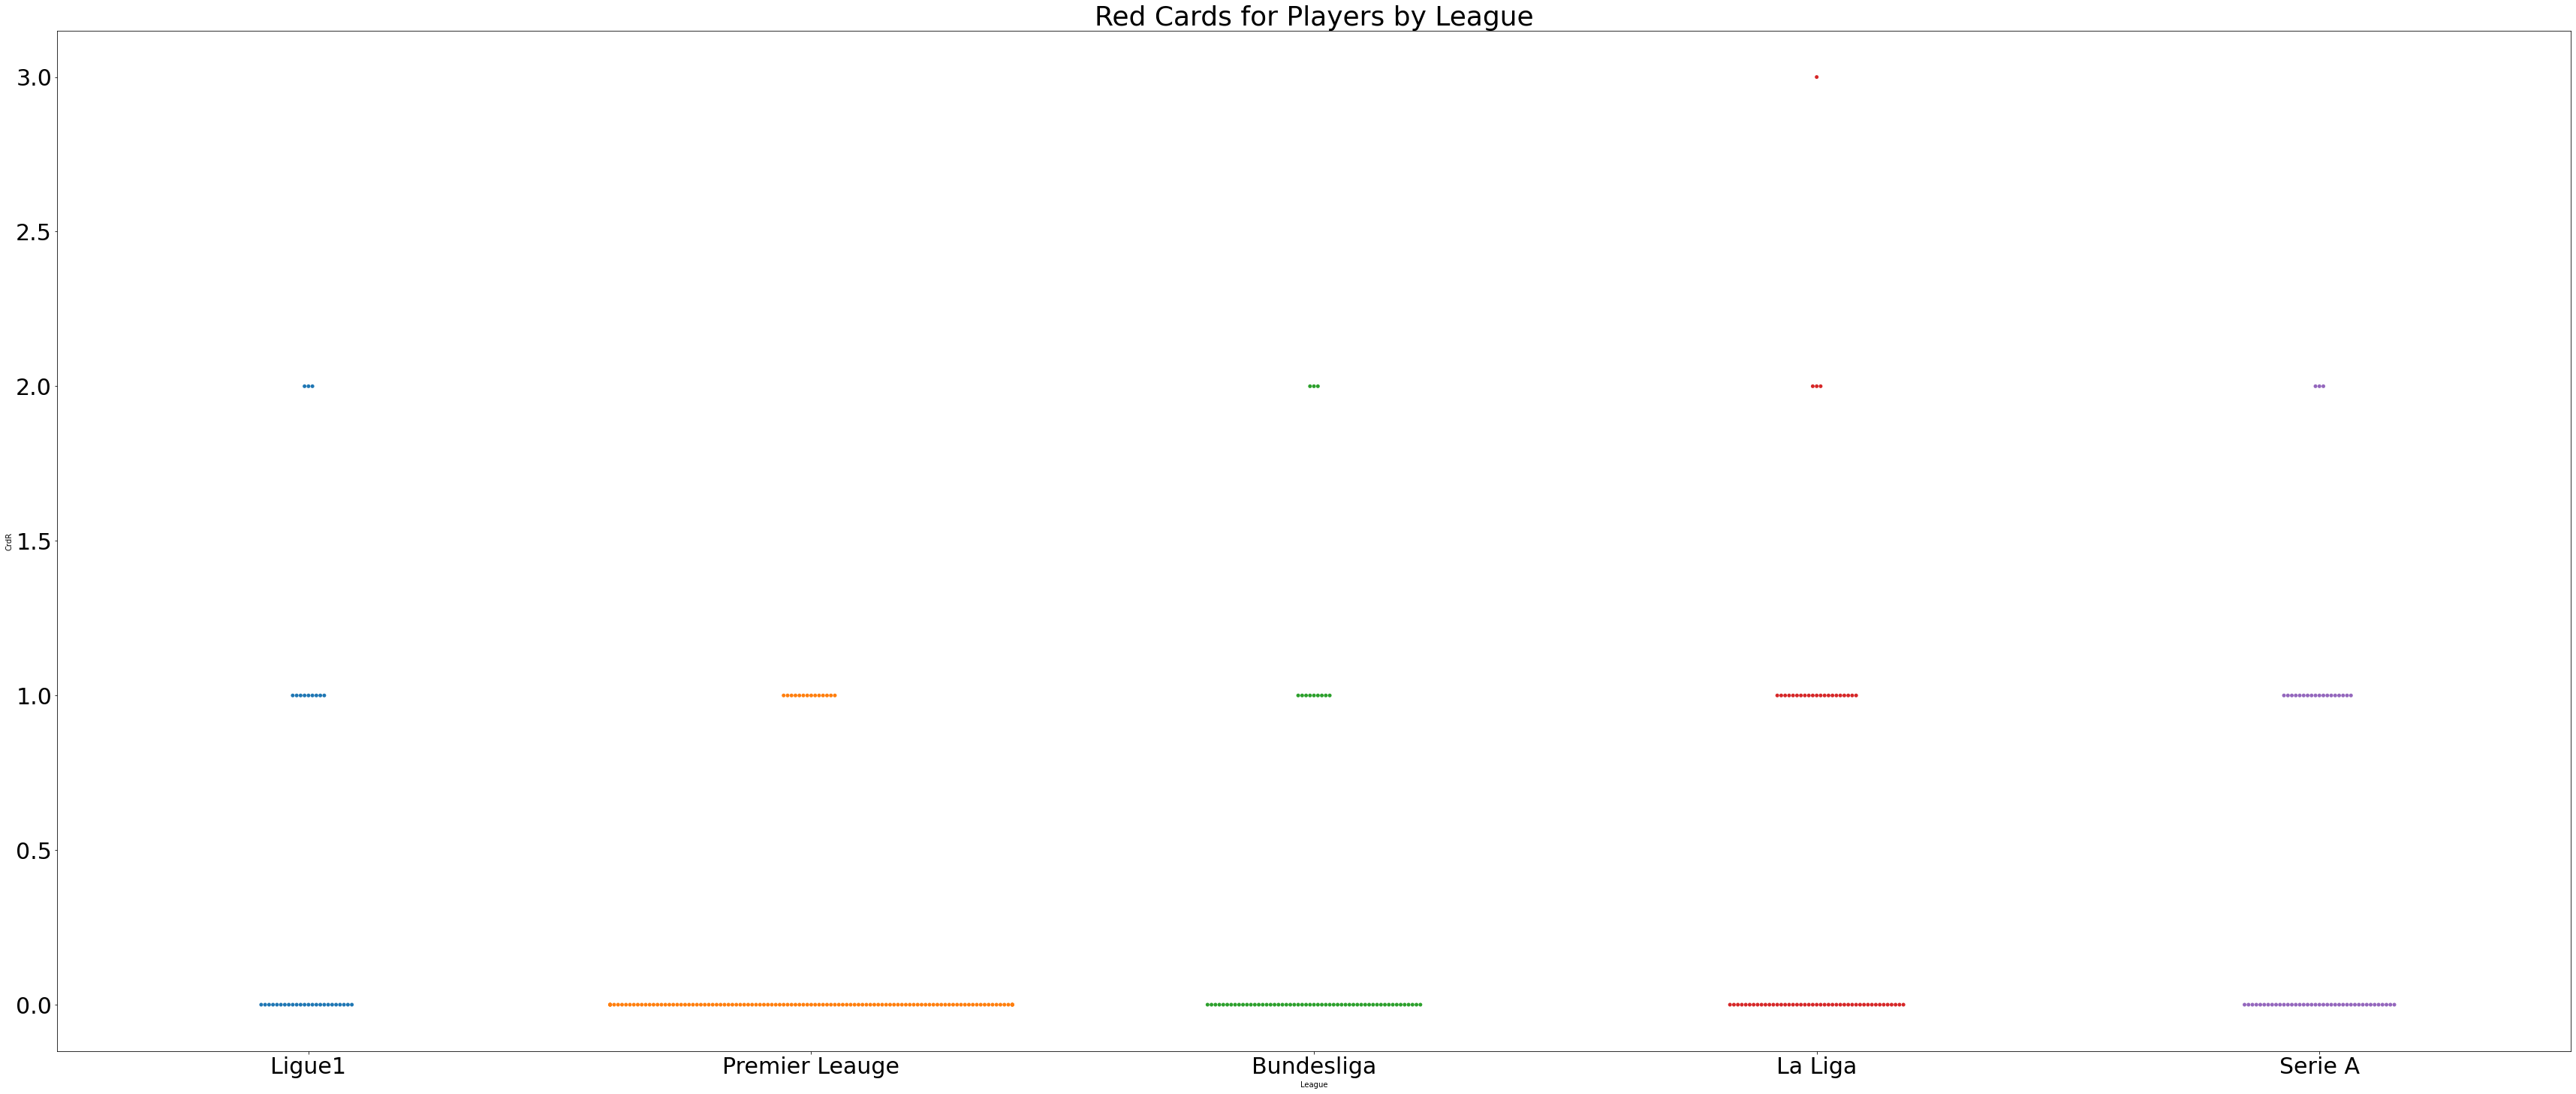

In [50]:
plt.figure(figsize=(60,25))

sns.swarmplot(x=football_data["League"],y=football_data["CrdR"])
plt.title("Red Cards for Players by League", fontdict={'fontsize': 36})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()